## 통계

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [5]:
# 환경 설정

import matplotlib
# 한글 설치(윈도우 버전)
matplotlib.rc('font',family='Malgun Gothic')
# 음수 표시
matplotlib.rc('axes',unicode_minus=False)
# 그래프 출력
%matplotlib inline

# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

In [7]:
# 자동차 기술통계치 구학

mycars=pd.read_csv('data/mycars.csv')
mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [19]:
mycars.columns

Index(['manufacturer', 'model', 'displacement', 'year', 'cylinder',
       'automatic', 'driving', 'mpg', 'highway_mileage', 'fuel', 'class'],
      dtype='object')

- 컬럼 뜻
- 'manufacturer' : 제조업체,
- 'model',
- 'displacement' : 배수량
- 'year',
- 'cylinder',-  'automatic'
-  'driving'
-  'mpg',: 연비
-  'highway_mileage' : 고속도로_마일리지
-  'fuel : 
연료
-  'clas],
      dtype='object'

In [9]:
mycars.describe().round(3)

,displacement,year,cylinder,mpg,highway_mileage
count,234.000,234.00,234.000,234.000,234.000
mean,3.472,2003.50,5.889,16.859,23.440
std,1.292,4.51,1.612,4.256,5.955
min,1.600,1999.00,4.000,9.000,12.000
25%,2.400,1999.00,4.000,14.000,18.000
50%,3.300,2003.50,6.000,17.000,24.000
75%,4.600,2008.00,8.000,19.000,27.000
max,7.000,2008.00,8.000,35.000,44.000


- 중위수 배수량 2.4 , 연식 2003년식 ,실린더 4 , 고속도로 마일리지 18
- 평균 배수량 3.5 연식 2003년식 , 실린더 16.8 고속도로 마일리지 23

평균이 중위수보다 크기 때문에 오른쪽으로 긴 꼬리 모양의 정규 분포를 가지고 있음
- 고속도로 마일리지
 - 상한 : 18 - 1.5*(27-18)
 - 하한 : 27 + 1.5*(27-18)

In [37]:
# 자동차 모델별,mpg 데이터 subset
df = mycars[['model','mpg']]
# 모델 별 데이터 수 평균 표준편차
df.groupby('model').describe().T

model      4runner 4wd         a4  a4 quattro  a6 quattro     altima  \
mpg count     6.000000   7.000000    8.000000         3.0   6.000000   
    mean     15.166667  18.857143   17.125000        16.0  20.666667   
    std       0.752773   1.864454    1.807722         1.0   1.966384   
    min      14.000000  16.000000   15.000000        15.0  19.000000   
    25%      15.000000  18.000000   15.750000        15.5  19.000000   
    50%      15.000000  18.000000   17.000000        16.0  20.000000   
    75%      15.750000  20.500000   18.250000        16.5  22.500000   
    max      16.000000  21.000000   20.000000        17.0  23.000000   

model      c1500 suburban 2wd      camry  camry solara  caravan 2wd  \
mpg count             5.00000   7.000000      7.000000    11.000000   
    mean             12.80000  19.857143     19.857143    15.818182   
    std               1.30384   1.463850      1.772811     1.834022   
    min              11.00000  18.000000     18.000000    11.000000   
    25%              12.00000  18.500000     18.000000    15.500000   
    50%              13.00000  21.000000     21.000000    16.000000   
    75%              14.00000  21.000000     21.000000    17.000000   
    max              14.00000  21.000000     22.000000    18.000000   

model          civic  ...    mustang  navigator 2wd  new beetle     passat  \
mpg count   9.000000  ...   9.000000       3.000000    6.000000   7.000000   
    mean   24.444444  ...  15.888889      11.333333   24.000000  18.571429   
    std     1.943651  ...   1.452966       0.577350    6.511528   1.902379   
    min    21.000000  ...  14.000000      11.000000   19.000000  16.000000   
    25%    24.000000  ...  15.000000      11.000000   20.000000  17.500000   
    50%    24.000000  ...  15.000000      11.000000   20.500000  18.000000   
    75%    25.000000  ...  17.000000      11.500000   27.000000  20.000000   
    max    28.000000  ...  18.000000      12.000000   35.000000  21.000000   

model      pathfinder 4wd  ram 1500 pickup 4wd  range rover     sonata  \
mpg count        4.000000            10.000000      4.00000   7.000000   
    mean        13.750000            11.400000     11.50000  19.000000   
    std          1.258306             1.505545      0.57735   1.414214   
    min         12.000000             9.000000     11.00000  18.000000   
    25%         13.500000            11.000000     11.00000  18.000000   
    50%         14.000000            11.500000     11.50000  18.000000   
    75%         14.250000            12.750000     12.00000  20.000000   
    max         15.000000            13.000000     12.00000  21.000000   

model        tiburon  toyota tacoma 4wd  
mpg count   7.000000           7.000000  
    mean   18.285714          15.571429  
    std     1.603567           0.786796  
    min    16.000000          15.000000  
    25%    17.000000          15.000000  
    50%    19.000000          15.000000  
    75%    19.500000          16.000000  
    max    20.000000          17.000000  

[8 rows x 38 columns]

## 모델 별 연비(mpg)
- carvan2wd 의 빈도수가 11로 젤 많다
  - carvan2wd 의 연비
    - 하한 : 15 -1.5*(17-115)
    - 상한 : 17 +-1.5*(17-115)


In [66]:
# 시내 연비(mpg) 통계치 계산
mpg_stats = mycars['mpg'].describe()

# 고속도로 연비(highway_mileage) 통계치 계산
highway_mileage_stats = mycars['highway_mileage'].describe()

mycars[['mpg','highway_mileage']].describe()

,mpg,highway_mileage
count,234.000000,234.000000
mean,16.858974,23.440171
std,4.255946,5.954643
min,9.000000,12.000000
25%,14.000000,18.000000
50%,17.000000,24.000000
75%,19.000000,27.000000
max,35.000000,44.000000


In [42]:
QC1 = pd.read_csv('data/EXH_QC1.csv')
df= QC1[['Flaws','Period']]

# Flaws 변수 count : value_count , 순서대로 정령 : sort_index
count = df['Flaws'].value_counts().sort_index()

# CumCnt 계산 : cumsum
cumcnt = np.cumsum(count)
# Percent 계산 : 직접
percent = count/sum(count)*100

# CumPct 계산 : cumsum
cumpct = np.cumsum(percent)

In [56]:
QC1.head()

,Flaws,Period,Strength,Baking Time,Cabbage weight
0,Scratch,Day,37.6,0.798922,3.6
1,Scratch,Day,38.6,0.849020,2.9
2,Peel,Day,37.2,0.816163,2.8
3,Peel,Day,36.4,0.758266,2.6
4,Smudge,Day,38.6,0.815894,3.4


In [44]:
# DataFrame 으로 취합
count_data = pd.DataFrame({'Count':count,'Cumcnt':cumcnt,
                          'Percent':percent,'CumPct':cumpct})

# Column의 name 생성
count_data.columns.name='Flaws'
count_data

Flaws,Count,Cumcnt,Percent,CumPct
Flaws,,,,
Other,6,6,15.0,15.0
Peel,15,21,37.5,52.5
Scratch,13,34,32.5,85.0
Smudge,6,40,15.0,100.0


In [46]:
# 다음 데이터는 자동차의 모델과 연비에 대한 자료에 
# 범주형 변수인 구동방식, 모델에 대해 counts,percents ,cumnulative counts , cumulative perents를 계산
mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [58]:
count = mycars['model'].value_counts().sort_index()

# CumCnt 계산 : cumsum
cumcnt = np.cumsum(count)
# Percent 계산 : 직접
percent = count/sum(count)*100

# CumPct 계산 : cumsum
cumpct = np.cumsum(percent)

# DataFrame 으로 취합
count_data = pd.DataFrame({'Count':count,'Cumcnt':cumcnt,
                          'Percent':percent,'CumPct':cumpct})

# Column의 name 생성
count_data.columns.name='model'
count_data

model,Count,Cumcnt,Percent,CumPct
model,,,,
4runner 4wd,6,6,2.564103,2.564103
a4,7,13,2.991453,5.555556
a4 quattro,8,21,3.418803,8.974359
a6 quattro,3,24,1.282051,10.256410
altima,6,30,2.564103,12.820513
c1500 suburban 2wd,5,35,2.136752,14.957265
camry,7,42,2.991453,17.948718
camry solara,7,49,2.991453,20.940171
caravan 2wd,11,60,4.700855,25.641026


In [60]:
count = mycars['driving'].value_counts().sort_index()

# CumCnt 계산 : cumsum
cumcnt = np.cumsum(count)
# Percent 계산 : 직접
percent = count/sum(count)*100

# CumPct 계산 : cumsum
cumpct = np.cumsum(percent)

# DataFrame 으로 취합
count_data = pd.DataFrame({'Count':count,'Cumcnt':cumcnt,
                          'Percent':percent,'CumPct':cumpct})

# Column의 name 생성
count_data.columns.name='Driving'
count_data

Driving,Count,Cumcnt,Percent,CumPct
driving,,,,
4,103,103,44.017094,44.017094
f,106,209,45.299145,89.316239
r,25,234,10.683761,100.000000


In [74]:
# 확률 계산 연습

from scipy import stats

# 누적 확률 값 계산
mu = 115
sigma = 20
x = 135
prob = stats.norm.cdf(x, mu, sigma)

print("{0}분 이상 걸리는 A/S 작업 비율: {1:.1f}%".format(x, (1 - prob) * 100))


135분 이상 걸리는 A/S 작업 비율: 15.9%


In [78]:
# 누적 확률 값 계산
mu = 175
sigma = 5
x = 180
prob = stats.norm.cdf(x, mu, sigma)

print("{0}인 키일경우에 나는 몇 %범위에 위치 할까요: {1:.1f}%".format(x, (1 - prob) * 100))

180인 키일경우에 나는 몇 %범위에 위치 할까요: 15.9%


In [80]:
# 누적 확률 값 계산
mu = 12
sigma = 3
x1 = 15
prob1 = stats.norm.cdf(x1, mu, sigma)

print("{0}km 이상 {1}km 이하를 달릴 확률은 {2:.3f}에 해당함".format(mu,x1, (prob1-0.5)))

12km 이상 15km 이하를 달릴 확률은 0.341에 해당함


In [82]:
# 누적 확률 값 계산
from scipy import stats

# 평균과 표준편차
mu = 12
sigma = 3

# 1) 9km 이상 15km 이하를 달릴 확률
x1 = 9
x2 = 15
prob1 = stats.norm.cdf(x1, mu, sigma)
prob2 = stats.norm.cdf(x2, mu, sigma)
prob_9_to_15 = prob2 - prob1

print("{0}km 이상 {1}km 이하를 달릴 확률은 {2:.3f}입니다".format(x1, x2, prob_9_to_15))

# 2) 15km 이상을 달릴 확률
prob3 = stats.norm.cdf(x2, mu, sigma)
prob_above_15 = 1 - prob3

print("{0}km 이상을 달릴 확률은 {1:.3f}입니다".format(x2, prob_above_15))


9km 이상 15km 이하를 달릴 확률은 0.683입니다
15km 이상을 달릴 확률은 0.159입니다


In [88]:
# t-분포 연습
from scipy import stats

t = 1.53
df = 5

# t-분포의 누적 분포 함수 계산
prob = stats.t.cdf(t, df)
print("P(T <= t) : {:.3f}".format(prob))


P(T <= t) : 0.907


In [92]:
t = 2.0
df = 100

# t-분포의 누적 분포 함수 계산
prob = stats.t.cdf(t, df)
print("P(T <= t) : {:.3f}".format(prob))

# cdf 는 누적확률이다 자세한 그림은 page 132p 참고

P(T <= t) : 0.976


In [96]:
# 카이재곱 분포 연습
chisq = 10
df =30

prob = stats.chi2.cdf(chisq,df)
print("P(X<={0}) : {1:.4f}".format(chisq,prob))

P(X<=10) : 0.0002


In [98]:
chisq = 3.0 # 카이제곱의 값
df =8 # 자유도 값

prob = stats.chi2.cdf(chisq,df)
print("P(X<={0}) : {1:.4f}".format(chisq,prob))

P(X<=3.0 : 0.0656


In [100]:
# F분포

f = 2.0
dfnum = 15
dfden = 15

prob = stats.f.cdf(x=f,dfn=dfnum,dfd=dfden)
print("P(X<=F) : {:.3f}".format(prob))

P(X<=F) : 0.904


In [102]:
# 실습
f = 1.5
dfnum = 10
dfden = 100

prob = stats.f.cdf(x=f,dfn=dfnum,dfd=dfden)
print("P(X<=F) : {:.3f}".format(prob))

P(X<=F) : 0.850


In [104]:
# 이항 분포
n = 3
for i in range(n+1):
    prob = stats.binom.pmf(k=i,n=n,p=0.4)
    print("P(X={0}) = {1:.3f}".format(i,prob))

P(X=0) = 0.216
P(X=1) = 0.432
P(X=2) = 0.288
P(X=3) = 0.064


In [106]:
n = 5
for i in range(n+1):
    prob = stats.binom.pmf(k=i,n=n,p=0.3)
    print("P(X={0}) = {1:.3f}".format(i,prob))

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002


In [108]:
# 구간 추정 연습

# df 직접 입력
df = pd.DataFrame({"sample":[3.6,2.9,2.8 ,2.6 , 3.4 , 3.2 , 2.2 , 2.6 , 2.4 ,
                            2.4, 2.6 , 3.4 , 2.4 , 2.1, 2.6 ,3.0 ,2.4 ,2.7 , 2.4,
                            2.6,2.9 ,2.9, 2.0,2.7,2.2,2.8,2.7,1.8,2.5,
                            3.0,3.2,2.8,2.6,3.2,3.1,2.9, 2.7,2.7, 2.2]})
df.head()

,sample
0,3.6
1,2.9
2,2.8
3,2.6
4,3.4


In [110]:
# 정규분포 구간 추정 함수 실행
lower,upper = stats.norm.interval(0.95, loc=np.mean(df),scale = 0.397/np.sqrt(40))
print("신뢰구간:({0},{1})" .format(lower.round(2),upper.round(2)))

신뢰구간:(2.57,2.82)


In [116]:
# df 직접 입력
df = pd.DataFrame({"sample":[18,18,20,21,20,23,19,18,17,21,22,
                             20,20,21,20,19,19,18,17,19]})
df.head()

,sample
0,18
1,18
2,20
3,21
4,20


In [118]:
# 정규분포 구간 추정 함수 실행
lower,upper = stats.norm.interval(0.95, loc=np.mean(df),scale = 3.8/np.sqrt(20))
print("신뢰구간:({0},{1})" .format(lower.round(2),upper.round(2)))

신뢰구간:(17.83,21.17)


In [122]:
df = pd.DataFrame({'sample': [54.1,53.3,56.1,55.7,54.0,54.1,54.5,57.1,55.2,53.8,
                             54.1,54.1,56.1,55.0,55.9,56.0,54.9,54.3,53.9,55.0]})

lower,upper = stats.t.interval(0.95,len(df)-1,loc=np.mean(df),scale = stats.sem(df))
print("신뢰구간:({0},{1}".format(lower.round(2),upper.round(2)))

신뢰구간:([54.39],[55.33]


In [124]:
# 150p
# 제품개발자는 새로개발된 강종의 평균 인장강도를 70kg/mm^2으로 기대하고 있음.
# 이를 검증하기 위해 시험 생산되는 강종 중 임의로 20개의 코일을 대상으로 랜덤하게 시편을 채취하였음
# 상기자료로부터 표분 평균은 71.50kg/mm^2 , 표본표준편차는 1.933kg/mm^2임을 알았음
# 이 모평균값의 95% 신뢰구간을 추정하시오.
df = pd.DataFrame({'sample': [73,71,74,69,70,73,70,68,75,72,
                             70,72,73,70,70,72,71,70,75,72]})

lower,upper = stats.t.interval(0.95,len(df)-1,loc=np.mean(df),scale = stats.sem(df))
print("신뢰구간:({0},{1}".format(lower.round(2),upper.round(2)))

신뢰구간:([70.6],[72.4]


## 유의수준 , 임계값 설명
임계값(Critical Value)과 유의수준(Significance Level)은 통계적 가설 검정에서 중요한 개념입니다. 두 개념은 서로 밀접하게 관련되어 있지만, 의미와 사용 방법에 차이가 있습니다.

## 유의수준 (Significance Level, 𝛼)
- 1) 정의: 유의수준은 귀무가설이 참일 때, 귀무가설을 기각할 확률을 의미합니다. 즉, 제1종 오류를 범할 확률입니다.
- 2) 일반적인 값: 통상적으로 0.05(5%) 또는 0.01(1%)가 많이 사용됩니다.
- 3) 역할: 유의수준은 임계값을 결정하는 데 사용됩니다. 가설 검정에서 관측된 통계량이 임계값보다 극단적인 경우, 귀무가설을 기각하게 됩니다.
- 4) 표현: 𝛼로 표기하며, 검정에서 "이 정도의 확률로 귀무가설을 기각하겠다"는 기준입니다.

## 임계값 (Critical Value)

- 1) 정의: 임계값은 주어진 유의수준 𝛼에서 귀무가설을 기각할 경계 값을 의미합니다.
- 2) 결정 방법: 유의수준 𝛼에 따라 분포의 해당하는 값을 찾습니다. 예를 들어, 유의수준 𝛼=0.05 ,α=0.05라면, 정규분포의 경우 양측 검정에서 상위 2.5%와 하위 2.5%에 해당하는 값이 임계값이 됩니다.
- 3) 역할: 관측된 통계량이 이 임계값을 벗어나면 귀무가설을 기각합니다. 즉, 임계값은 기각역을 설정하는 데 사용됩니다.
- 4) 표현: 특정 검정 방법과 분포에 따라 달라집니다. 예를 들어, 정규분포에서는 𝑍-값, t-분포에서는 𝑡-값, 카이제곱 분포에서는 𝜒2-값 등을 임계값으로 사용합니다.

## 예제: 정규분포를 이용한 가설 검정
- 1) 유의수준 설정: a =0.05 (5%)
- 2) 임계값 결정: 유의수준 𝛼에 따라 정규분포의 양 끝 2.5% 부분에 해당하는 임계값은 약 ± 1.96 입니다 (양측 검정의 경우).
- 3) 검정 통계량 계산: 예를 들어, 표본 평균을 이용해  𝑍-값을 계산합니다.
- 4) 결정: 계산된 𝑍-값이 −1.96보다 작거나 1.96보다 크면, 귀무가설을 기각합니다. 그렇지 않으면 귀무가설을 기각하지 않습니다.
- 요약
유의수준 (𝛼): 가설 검정에서 허용하는 제1종 오류의 확률. 통상적으로 0.05 또는 0.01을 사용합니다.
임계값: 주어진 유의수준에 따라 결정되며, 관측된 통계량이 이 값을 벗어날 경우 귀무가설을 기각합니다.
두 개념은 통계적 가설 검정에서 중요한 역할을 하며, 유의수준이 임계값을 결정하는 데 사용됩니다.

In [139]:
# 정규성 검정 연습

df = pd.read_csv('data/camshaft.csv')
df.head()

,Length,Supp1,Supp2
0,601.4,598.0,601.6
1,601.6,599.8,600.4
2,598.0,600.0,598.4
3,601.4,599.8,600.0
4,599.4,600.0,596.8


In [141]:
statistic, p =stats.shapiro(df['Supp1'])
statistic, p ( 0.9788166284561157,0.1074606254696846)

print("Shapiro-Wilk Test: statistic={},p-value{}".format(statistic,p))

TypeError: 'float' object is not callable

In [143]:
import pandas as pd
from scipy import stats

# 데이터프레임 예시


# Shapiro-Wilk 검정 수행
statistic, p = stats.shapiro(df['Supp1'])

# 결과 출력
print("Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic, p))


Shapiro-Wilk Test: statistic=0.9788166284561157, p-value=0.1074606254696846


In [147]:
df = pd.read_csv('data/2sample_t_test.csv')

statistic, p = stats.shapiro(df['Mat_A'])

# 결과 출력
print("Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic, p))


Shapiro-Wilk Test: statistic=nan, p-value=1.0


In [149]:
statistic, p = stats.shapiro(df['Mat_B'])

# 결과 출력
print("Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic, p))

Shapiro-Wilk Test: statistic=nan, p-value=1.0


In [151]:
df.head()

,Mat_A,Mat_B,Total,Sub
0,73.4,68.7,73.4,1
1,77.0,71.4,77.0,1
2,73.7,69.8,73.7,1
3,73.3,75.3,73.3,1
4,73.1,71.3,73.1,1


In [153]:
df.dropna(inplace=True)

In [155]:
statistic, p = stats.shapiro(df['Mat_A'])

# 결과 출력
print("Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic, p))


Shapiro-Wilk Test: statistic=0.906264066696167, p-value=0.2563020884990692


In [157]:
statistic, p = stats.shapiro(df['Mat_B'])

# 결과 출력
print("Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic, p))

Shapiro-Wilk Test: statistic=0.9729753732681274, p-value=0.9169775247573853


## 연습
고객 서비스센터의 고객 만족도 평균은 76.7이다 -> 귀무가설
개선 활동을 완료한 후 다음과 같은 10개의 고객 만족도 데이터를 얻었다. ->정규성 검정
개선활동이 만족도를 변화 시켰는가? 유의가설(a=0.05)

<Axes: >

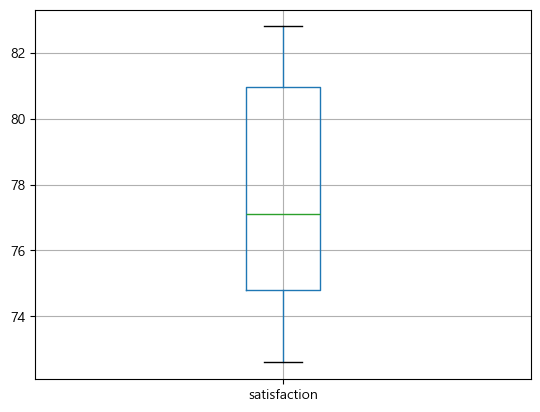

In [160]:
# 1sample t-test 연습
df = pd.DataFrame({'satisfaction':[74.5,81.2,73.8,82.0,76.3,75.7,80.2,72.6,77.9,82.8]})

df.boxplot()

In [164]:
# satisfaction 정규성 검정
statistic, p = stats.shapiro(df['satisfaction'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9331594705581665, p-value=0.4796782433986664


In [166]:
# 1-Sample t-test
t_result = stats.ttest_1samp(df,76.7)

In [168]:
# 1-sample t-test의 t값 p 값 저장
t,p= t_result.statistic.round(3),\
    t_result.pvalue.round(3)

In [170]:
# 1-sample t-test의 t 값 p 값 출력
print("1-Sample t -test")
print(" t-통계량 : {}".format(t))
print(" p-value : {}".format(p))

1-Sample t -test
 t-통계량 : [0.864]
 p-value : [0.41]


## 실습
고객 서비스센터의 고객 만족도 평균은 78.0이다 -> 귀무가설
개선활동을 완료한 후 다음과 같은 10개의 고객 만족도 데이터를 얻었다 -> 정규성 검정
개선 활동이 만족도를 변화 시켰는가? 유의수준(a=0.05)

<Axes: >

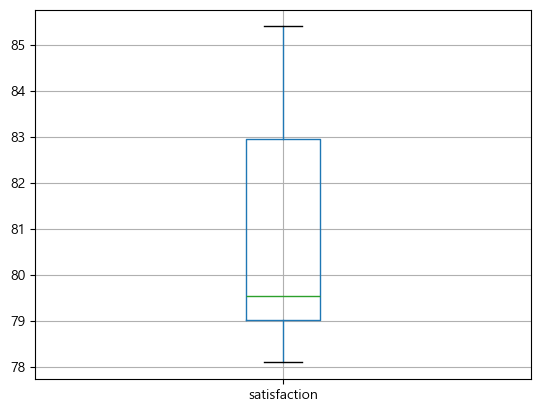

In [173]:
# 1sample t-test 연습
df = pd.DataFrame({'satisfaction':[85.0,79.0,79.1,79.9,81.6,78.6,85.4,83.4,78.1,79.2]})

df.boxplot()

In [175]:
# 1-Sample t-test
t_result = stats.ttest_1samp(df,78.0)

In [177]:
# 1-sample t-test의 t값 p 값 저장
t,p= t_result.statistic.round(3),\
    t_result.pvalue.round(3)
# 1-sample t-test의 t 값 p 값 출력
print("1-Sample t -test")
print(" t-통계량 : {}".format(t))
print(" p-value : {}".format(p))

1-Sample t -test
 t-통계량 : [3.379]
 p-value : [0.008]


## 2 sample t-test 연습
고객만족도 확인을 위하여 A 고객과 B 고객에 대해 Survey하여 다음의 데이터를 얻었다.
A 고객과 B고객의 모평균차이가 있다고 할 수 있는가? -> 귀무가설 (유의수준 a =0.05)
- 데이터(10점 척도 , n=20)

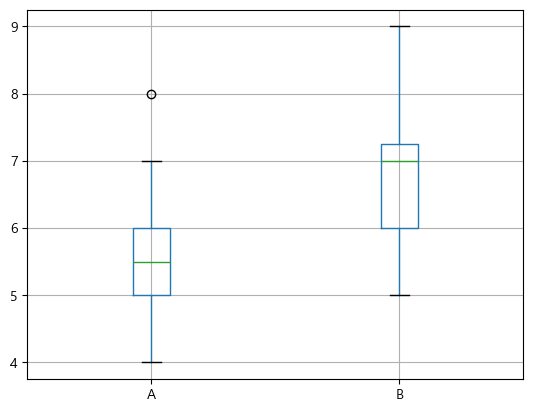

In [180]:
df = pd.DataFrame({'A':[6,5,5,4,6,7,6,4,5,6,4,5,5,6,4,8,6,5,6,7],
                  'B':[7,6,7,8,7,8,8,5,7,6,5,5,6,6,5,7,9,7,7,8]})
# 그룹 별 boxplot
df.boxplot(['A','B'])
plt.show()

In [182]:
# 'A','B' 정규성-검정 : Shapiro-Wilk Test
statistic,p = stats.shapiro(df['A'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9094840288162231, p-value=0.06230909377336502


In [184]:
statistic,p = stats.shapiro(df['B'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.914249062538147, p-value=0.07683517038822174


In [186]:
# 등분산성 검정
stats.bartlett(df['A'],df['B'])

BartlettResult(statistic=0.0784806443146898, pvalue=0.7793670509889603)

In [190]:
# 2-Sample t-test
t_result =stats.ttest_ind(df['A'],df['B'])

# 2-sample t-test 의 값 p 값 저장
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)



In [194]:
# 2-Sample t-test 의 t값 p 값 출력
print("2-Sample t -test")
print(" t-통계량 : {}".format(t))
print(" p-value : {}".format(p))

# p값이 0.002 이므로 모평균에 차이가 있고
# 검정 통계량이 음수라서 B 고객의 모평균이 더 크다

2-Sample t -test
 t-통계량 : -3.335
 p-value : 0.002


## 2-sample t-test 실습
제품을 A 공급자과 B 공급자로 부터 제품을 받아 두께를 측정해서 다음의 데이터를 얻었다.
공급자 간에 모평균에 차이가 있다고 할수 있는가? -> 귀무가설 (유의수준 a= 0.05)



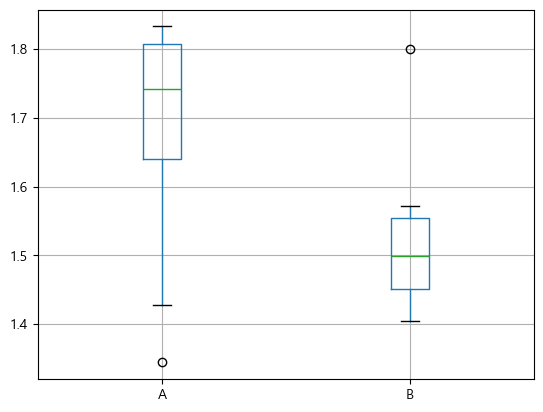

In [197]:
df = pd.DataFrame({'A':[1.833,1.715,1.799,1.768,1.711,1.832,1.427,1.344],
                  'B':[1.435,1.572,1.486,1.511,1.457,1.548,1.404,1.800]})
# 그룹 별 boxplot
df.boxplot(['A','B'])
plt.show()


In [199]:
# 'A','B' 정규성-검정 : Shapiro-Wilk Test
statistic,p = stats.shapiro(df['A'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.7907294034957886, p-value=0.02275930531322956


In [201]:
statistic,p = stats.shapiro(df['B'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.8393934369087219, p-value=0.07424874603748322


In [203]:
# 등분산성 검정
stats.bartlett(df['A'],df['B'])

BartlettResult(statistic=1.1061553506685082, pvalue=0.2929192195141279)

In [205]:
# 2-Sample t-test
t_result =stats.ttest_ind(df['A'],df['B'])

# 2-sample t-test 의 값 p 값 저장
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)


# 2-Sample t-test 의 t값 p 값 출력
print("2-Sample t -test")
print(" t-통계량 : {}".format(t))
print(" p-value : {}".format(p))

# p값이 0.077 이므로 대립가설 채택
# 검정 통계량이 양수라서 A 고객의 모평균이 더 크다

2-Sample t -test
 t-통계량 : 1.909
 p-value : 0.077


## Pired t-test 연습
회사원 10명에 대해 영어 점수가 학원가기 전/후에 영어점수가 짝을 이루고 있다.
회사원들의 성적은 학원가기 전후에 대해 차이가 있는지 검정하라 (유의수준 a=0.05)

In [210]:
df1 = pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648],
                   })
df2 = pd.DataFrame({'after':[810,670,790,712,810,670,790,712,790,712]})

# Pared t-test
t_result = stats.ttest_rel(df1,df2)

# Paired t-test의 t값 p 값 저장
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)

In [212]:
# Pared t-test
t_result = stats.ttest_rel(df1,df2)

# Paired t-test의 t값 p 값 저장
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)
# Paired t-test 의 t값 p 값 출력
print("Paired t -test")
print(" t-통계량 : {}".format(t))
print(" p-value : {}".format(p))

# p값이 0이므로 회사원들의 성적은 학원가기 전후에 대해 차이가 없다. 대립가설
# 검정통계량이 음수이므로 after의 값이 더 크다.

Paired t -test
 t-통계량 : [-5.324]
 p-value : [0.]


In [214]:
# Pired t-test 실습

# 회사원 10명에 대해 영어점수가 학원가기 전/후에 영어 점수가 짝을 이루고 있다.
# 회사원들의 성적은 학원가기 전후에 대해 차이가 있는지 검정하라. (유의수준 a=0.05)

df1 = pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648],
                   })
df2 = pd.DataFrame({'after':[710,580,787,712,750,600,782,670,790,680]})

# Pared t-test
t_result = stats.ttest_rel(df1,df2)

# Paired t-test의 t값 p 값 저장
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)
# Paired t-test 의 t값 p 값 출력
print("Paired t -test")
print(" t-통계량 : {}".format(t))
print(" p-value : {}".format(p))

# p값이 0이므로 회사원들의 성적은 학원가기 전후에 대해 차이가 있다. 귀무가설
# 검정통계량이 음수이므로 after의 값이 더 크다.

Paired t -test
 t-통계량 : [-2.266]
 p-value : [0.05]
